# **AYUSH**

1. Identify Categorical variables & Continuous Variables

2. Carry on a Univariate analysis on all the Variables/Fields. User bar plots for Categorical Variables & histogram or line plot for Continuous ones. Label the plot and axis clearly for intuitive understanding. Mention observations drawn from each Univariate plot

3. Show a bivariate analysis between Salary and hour_per_week.Choose a plot of your choice. Mention the inferences drawn

4. For each Education type , showcase the distribution of Salary .Use Seaborn Facetgrid & Line plot.Identify the key observations and mention them

5. Categorizing each Gender & Relationship status (combination of all values) , plot the hours_per_week worked.Choose appropriate plots.Mention the inferences drawn

6. How many Males that have Marital status ‘Married-civ-spouse’ are earning above 150,000 ?

7. Are Divorced Individuals of higher age compared to Individuals that are Not-in-family ? Using mean as a measure , answer the above question & mention the respective age of the two groups


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
emp=pd.read_csv('employee_data.csv',sep='\t')
print("Shape : ",emp.shape)

Shape :  (978, 8)


In [3]:
emp

,age,employment_type,salary,education,marital-status,relationship,Gender,hours_per_week
0,39,State-gov,77516,Bachelors,Never-married,Not-in-family,Male,40
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Husband,Male,13
2,38,Private,215646,HS-grad,Divorced,Not-in-family,Male,40
3,53,Private,234721,11th,Married-civ-spouse,Husband,Male,40
4,28,Private,338409,Bachelors,Married-civ-spouse,Wife,Female,40
...,...,...,...,...,...,...,...,...
973,37,Private,200153,HS-grad,Married-civ-spouse,Husband,Male,40
974,44,Private,32185,HS-grad,Never-married,Unmarried,Male,70
975,25,Private,178326,Some-college,Never-married,Not-in-family,Female,40
976,21,Private,255957,Some-college,Never-married,Not-in-family,Female,40


In [4]:
emp.columns

Index(['age', 'employment_type', 'salary', 'education', 'marital-status',
       'relationship', 'Gender', 'hours_per_week'],
      dtype='object')

---
# 1. Identify Categorical variables & Continuous Variables
---



Among columns `['age', 'employment_type', 'salary','education','marital-status','relationship', 'Gender', 'hours_per_week']`



`employment_type, education, marital-status, relationship, Gender` are **Categorical variables**


`age, salary, hours_per_week` are **Continous variables**



In [5]:
for i in emp:
  print(len(emp[i].unique()),"\t-",emp[i].dtype," - ",i)

65 	- int64  -  age
7 	- object  -  employment_type
966 	- int64  -  salary
16 	- object  -  education
7 	- object  -  marital-status
6 	- object  -  relationship
2 	- object  -  Gender
56 	- int64  -  hours_per_week


---
# 2. Carry on a Univariate analysis on all the Variables/Fields. User bar plots for Categorical Variables & histogram or line plot for Continuous ones. Label the plot and axis clearly for intuitive understanding. Mention observations drawn from each Univariate plot
---



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c32aa24e0>,
      dtype=object)

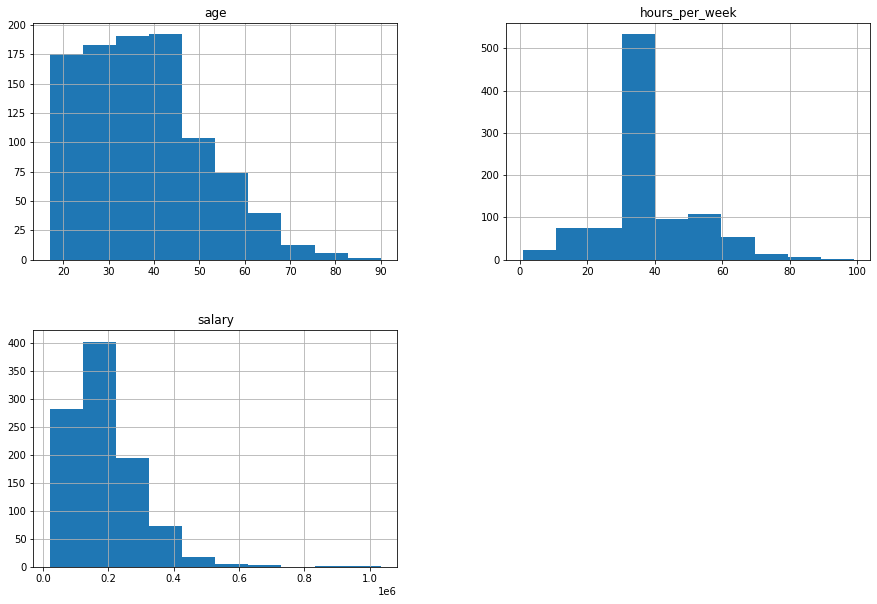

In [6]:
emp.hist(figsize=[15,10])

**Inferences** drawn from the above graphs : 


*   The *Age* Graph shows that the majority of the employees are of age group 30-50. And there arevery few employees of age >80.
*   The *hour_per_week* graph shows that the maximum of the employees work for 30-40 hours per week.
*   The *salary* graph shows that the maximum of the employees has the salary ranging from 0.1 to 0.2 ^6. And There are very few employees with 1.0 ^6 salary





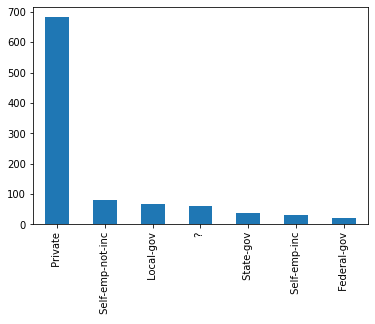

In [7]:
emp['employment_type'].value_counts().plot.bar()

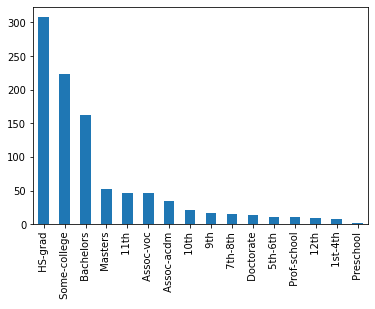

In [8]:
emp['education'].value_counts().plot.bar()

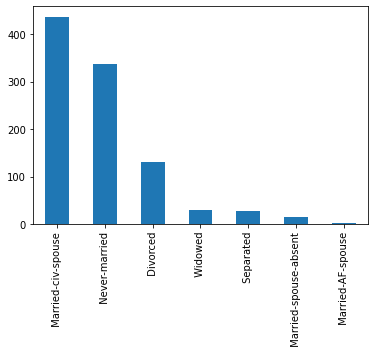

In [9]:
emp['marital-status'].value_counts().plot.bar()

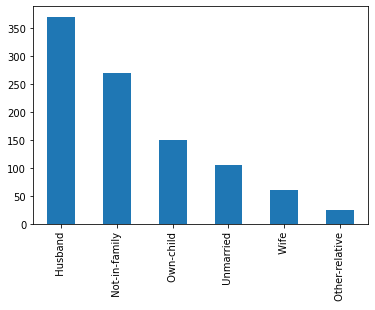

In [10]:
emp['relationship'].value_counts().plot.bar()

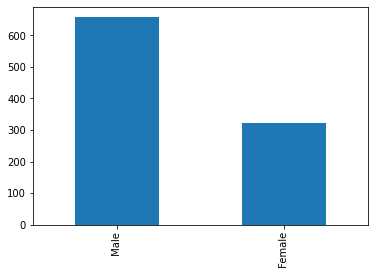

In [11]:
emp['Gender'].value_counts().plot.bar()

**Inferences** drawn from the above graphs : 


*   The *employment_type* Graph shows that the majority of the employees working in private sector. There are less number of employees working for State-gov, Self-emp-inc and Fedral-gov.
*   The *education* graph shows that the maximum number of the employees has completed HS-graduation and there are very less number of employees that has completed pre-school
*   The *marital-status* graph shows that the maximum of the employees are married to civilian and other maximum part of the employees are Not married. There are few employees that are widowed, divorced, separated. 
There are very few employees that are married to a Armed Force Spouse.
* The *relationship* graph shows most of the employees are Husband.
* The *Gender* Graph shows that there over 600 males and about 300 females 





---
#3. Show a bivariate analysis between Salary and hours_per_week.Choose a plot of your choice. Mention the inferences drawn
---



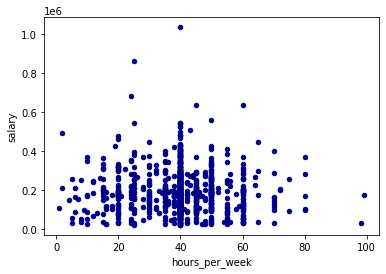

In [12]:
emp.plot.scatter(x='hours_per_week', y='salary', color='DarkBlue')

**Inference** drawn from the above graph between salary and hours_per_week are :
* The higest salary is for the 40 hours per week
* There is a large gap in the values after 80 on x axix this shows that those values can be outliers in the dataset 
* As the work hours per week is increasing the salary is also incresing.
* There ara lot of points in the range 20 to 60 and more dense points in the range 30-50.



---
# 4. For each Education type , showcase the distribution of Salary .Use Seaborn Facetgrid & Line plot.Identify the key observations and mention them
---



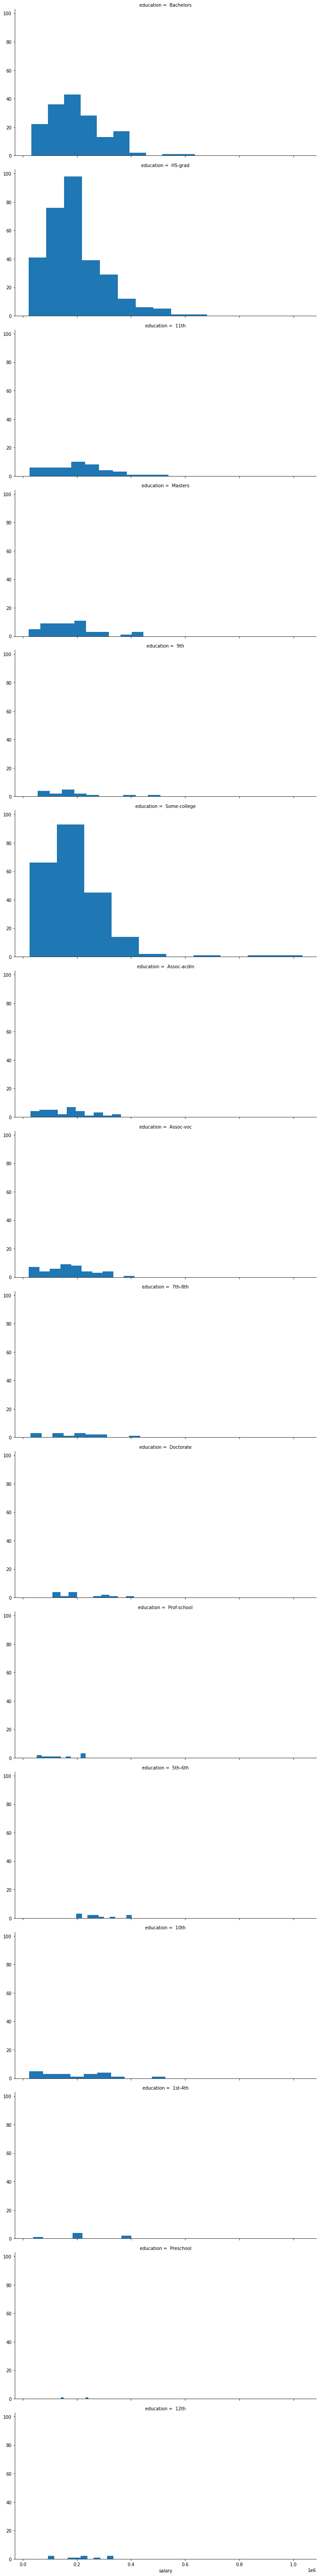

In [13]:
fn =sns.FacetGrid(emp,row="education",height=5,aspect=2)
fn = fn.map(plt.hist,"salary")

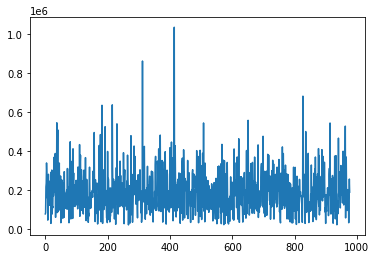

In [14]:
emp['salary'].plot.line()

The key observations drawn from the above plots are : 
* There are very less employees with education as preschool
* Number of HS-grad students are more and gets low salary
* Students with 11th and assoc-acdm as education gets high salart



---
# 5. Categorizing each Gender & Relationship status (combination of all values) , plot the hours_per_week worked.Choose appropriate plots.Mention the inferences drawn
---



In [15]:
emp.groupby(['Gender','relationship'],as_index=True)['hours_per_week'].sum()

Gender   relationship   
 Female   Not-in-family      4638
          Other-relative      220
          Own-child          1656
          Unmarried          2784
          Wife               2334
 Male     Husband           16118
          Not-in-family      6356
          Other-relative      688
          Own-child          3077
          Unmarried          1051
          Wife                 40
Name: hours_per_week, dtype: int64

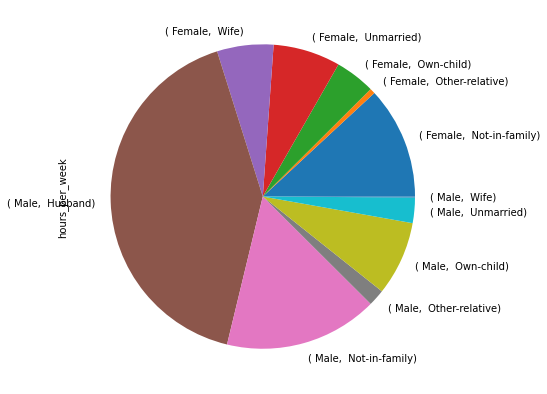

In [16]:
emp.groupby(['Gender','relationship'])['hours_per_week'].sum().plot.pie(figsize=[7,7])

* Male-Husbands works for larger number of hours per week
* Female-Other relative works for the least hours per week



---
# 6. How many Males that have Marital status ‘Married-civ-spouse’ are earning above 150,000 ?
---



In [17]:
#emp.loc[(emp['marital-status']=='Married-civ-spouse') & (emp['salary']>150000)]
a=emp[(emp['Gender'] == ' Male') & (emp['marital-status'] == ' Married-civ-spouse') & (emp['salary'] > 150000) ]
print(a)
print("\nTotal Married civilian spouse earning more than 150000 are : ",a.shape[0])

     age    employment_type  salary  ... relationship Gender hours_per_week
3     53            Private  234721  ...      Husband   Male             40
7     52   Self-emp-not-inc  209642  ...      Husband   Male             45
9     42            Private  159449  ...      Husband   Male             40
10    37            Private  280464  ...      Husband   Male             80
15    34            Private  245487  ...      Husband   Male             45
..   ...                ...     ...  ...          ...    ...            ...
967   55   Self-emp-not-inc  189721  ...      Husband   Male             20
968   48            Private  164966  ...      Husband   Male             40
970   34            Private  202046  ...      Husband   Male             35
973   37            Private  200153  ...      Husband   Male             40
977   40          State-gov  188693  ...      Husband   Male             35

[226 rows x 8 columns]

Total Married civilian spouse earning more than 150000 are :  2



---
# 7. Are Divorced Individuals of higher age compared to Individuals that are Not-in-family ? Using mean as a measure , answer the above question & mention the respective age of the two groups
---



In [18]:
m1=emp[(emp['relationship']== ' Not-in-family') & (emp['marital-status'].isin([' Never-married',' Separated',' Widowed']))]['age'].mean()
m2=emp[(emp['marital-status'] ==" Divorced") & (emp['relationship'].isin([' Unmarried',' Own-child',' Other-relative']))]['age'].mean()
print("The mean age of individuals that are not in family is : ",m1)
print("The mean age of individuals that are divorced is : ",m2)

The mean age of individuals that are not in family is :  35.24867724867725
The mean age of individuals that are divorced is :  40.67272727272727


Age of divorced individuals are higher than the age of individuals that are not in family.